# Datos Faltantes

In [1]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.impute import SimpleImputer, KNNImputer
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Cargar el conjunto de datos
diabetes = load_diabetes(as_frame=True)
data = diabetes.data
data['target'] = diabetes.target

In [3]:
data.sample(10)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
63,-0.034575,-0.044642,-0.037463,-0.060756,0.020446,0.043466,-0.013948,-0.002592,-0.030748,-0.071494,128.0
205,-0.030942,-0.044642,0.046607,0.014987,-0.016704,-0.047034,0.000779,-0.002592,0.063453,-0.025930,99.0
157,-0.001882,0.050680,-0.033151,-0.018306,0.031454,0.042840,-0.013948,0.019917,0.010227,0.027917,84.0
91,0.045341,-0.044642,0.051996,-0.053870,0.063101,0.064760,-0.010266,0.034309,0.037236,0.019633,164.0
197,0.048974,0.050680,0.003494,0.070072,-0.008449,0.013404,-0.054446,0.034309,0.013317,0.036201,129.0
233,0.067136,-0.044642,0.036907,-0.050427,-0.023584,-0.034508,0.048640,-0.039493,-0.025953,-0.038357,90.0
261,0.048974,-0.044642,-0.041774,0.104501,0.035582,-0.025739,0.177497,-0.076395,-0.012909,0.015491,103.0
410,-0.009147,0.050680,-0.027762,0.008101,0.047965,0.037203,-0.028674,0.034309,0.066051,-0.042499,209.0
368,-0.016412,0.050680,0.002417,0.014987,0.021822,-0.010082,-0.024993,0.034309,0.085531,0.081764,123.0
20,-0.049105,-0.044642,-0.056863,-0.043542,-0.045599,-0.043276,0.000779,-0.039493,-0.011897,0.015491,68.0


In [4]:
# Simular valores faltantes
np.random.seed(42)
data.loc[data.sample(frac=0.1).index, 'bmi'] = np.nan
data.loc[data.sample(frac=0.1).index, 'bp'] = np.nan

# Ejercicios
Contesta las siguientes preguntas. Para cada pregunta, deberás escribir código que demostrará cómo llegaste al resultado:

### 1. ¿Cuántos valores faltantes hay en cada columna?**

In [5]:
# Contar valores faltantes por columna
missing_values = data.isnull().sum()
missing_values


age        0
sex        0
bmi       44
bp        44
s1         0
s2         0
s3         0
s4         0
s5         0
s6         0
target     0
dtype: int64

### 2. Utiliza imputación simple (media) para llenar los valores faltantes de la columna 'bmi'.

In [7]:
# Imputación simple usando la media para la columna 'bmi'
imputer = SimpleImputer(strategy='mean')
data[['bmi']] = imputer.fit_transform(data[['bmi']])

# Verificar que ya no haya valores faltantes en 'bmi'
data['bmi'].isnull().sum()


np.int64(0)

### 3. Utiliza KNNImputer para imputar valores en las columnas 'bmi' y 'bp'. Compara los resultados con los de la imputación simple.

In [8]:
# Crear una copia de los datos con los valores faltantes originales
data_knn = data.copy()

# Volver a introducir algunos NaN en 'bmi' y 'bp' para simular antes de KNN
np.random.seed(42)
data_knn.loc[data_knn.sample(frac=0.1).index, 'bmi'] = np.nan
data_knn.loc[data_knn.sample(frac=0.1).index, 'bp'] = np.nan

# Imputación usando KNN
knn_imputer = KNNImputer(n_neighbors=5)
data_knn[['bmi', 'bp']] = knn_imputer.fit_transform(data_knn[['bmi', 'bp']])

# Verificar que ya no haya valores faltantes
print(data_knn[['bmi', 'bp']].isnull().sum())

# Comparar valores originales imputados con imputación simple
comparison = pd.DataFrame({
    'SimpleImputer_bmi': data['bmi'],
    'KNNImputer_bmi': data_knn['bmi'],
    'KNNImputer_bp': data_knn['bp']
})

comparison.head(10)

bmi    0
bp     0
dtype: int64


,SimpleImputer_bmi,KNNImputer_bmi,KNNImputer_bp
0,0.061696,0.061696,0.021872
1,-0.051474,-0.051474,0.003970
2,0.044451,0.044451,-0.005670
3,-0.011595,-0.011595,-0.036656
4,-0.036385,-0.036385,0.021872
5,-0.040696,-0.040696,-0.019442
6,-0.047163,-0.047163,-0.015999
7,-0.001895,-0.001895,0.066629
8,0.061696,0.061696,-0.040099
9,-0.000205,-0.025822,-0.033213


### 4. Genera un histograma comparando los datos antes y después de la imputación en la columna 'bmi'.

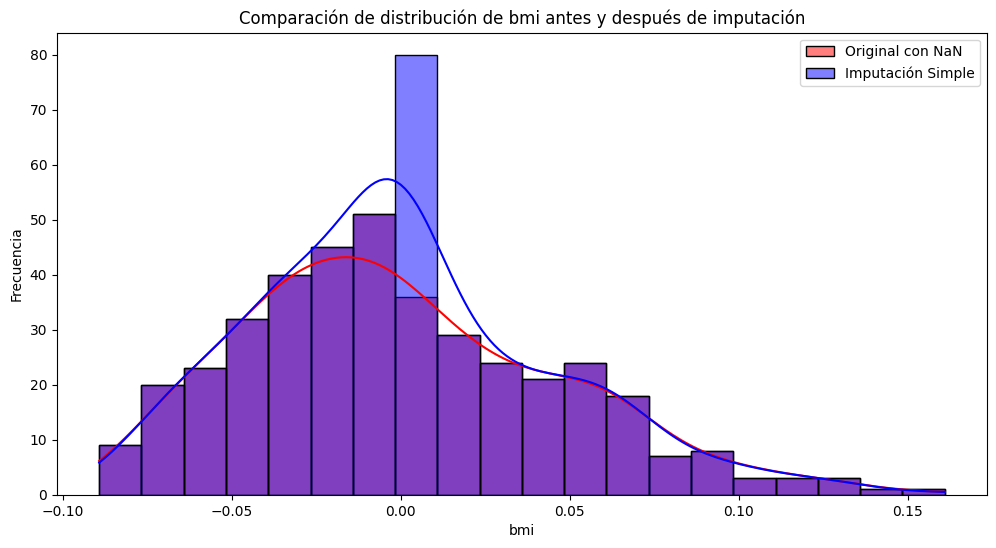

In [9]:
# Guardar datos originales con NaN para la comparación
data_original = diabetes.data.copy()
np.random.seed(42)
data_original.loc[data_original.sample(frac=0.1).index, 'bmi'] = np.nan

# Imputación simple (ya realizada antes)
data_imputed = data.copy()

# Graficar histogramas
plt.figure(figsize=(12,6))
sns.histplot(data_original['bmi'], color='red', label='Original con NaN', kde=True, bins=20)
sns.histplot(data_imputed['bmi'], color='blue', label='Imputación Simple', kde=True, bins=20)
plt.title('Comparación de distribución de bmi antes y después de imputación')
plt.xlabel('bmi')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()
